In [206]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom


In [310]:
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)


In [342]:
class PerceptronWithOneUpdate(object):
    def __init__(self, Z):
        self.W = np.zeros(len(Z[0:10]))
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data, Z):
        d = np.array(data)[:, 3:4]
        flag = True
        while flag:
            for i in range(len(data)):
                y = self.predict(Z[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * Z[i]
                    flag = False;
                    break;
            return self.W

In [343]:
class Pocket(object):
    def __init__(self, data, Z):
        self.W = np.zeros(len(Z[0:10]))
        self.Emin = self.computeEmin(data, Z,self.W)
        self.EminArr = []
        self.Iterations = []
        self.Wcurr = self.W
    
    def predict(self, x, W):
        activation = np.sign(np.dot(W.T,x))
        return activation
    
    def computeEmin(self, data,Z, W):
        count = 0
        d = np.array(data)[:, 3:4]
        for i in range(len(data)):
            if d[i] != self.predict(Z[i], W):
                count = count + 1
        return count/len(data)
    
    def compute(self, data, Z):
        perceptron = PerceptronWithOneUpdate(Z) 
        
        for i in range(100000):
            self.Wcurr = perceptron.fit(data, Z)
            newEmin = self.computeEmin(data,Z,self.Wcurr)
            
            if  newEmin < self.Emin:
                self.Emin = newEmin
                self.W = self.Wcurr
            self.EminArr.append(self.Emin)
            self.Iterations.append(i+1)


In [344]:
class LinearRegression(object):
        
    
    def compute(self, data, Z):
        y = np.array(data)[:, 3:4]
        return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(Z),Z)), np.transpose(Z)), y)

In [345]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
Xn = np.array(data)[:,1:3]
poly = PolynomialFeatures(degree)
Z= poly.fit_transform(Xn)

In [346]:
linearRegression = LinearRegression()
Wmin = linearRegression.compute(data, Z)
print(Wmin)

[[-8.98333760e-01]
 [ 1.76578861e-02]
 [ 1.22246222e-01]
 [ 9.00842773e-03]
 [ 1.28989198e-02]
 [ 1.53000138e-02]
 [-3.99164747e-04]
 [-5.55775520e-04]
 [-1.09072119e-03]
 [-1.03714751e-03]]


In [347]:
pocket = Pocket(data, Z)
pocket.compute(data, Z)
print(pocket.W);

[ -44167.          -36533.60983823  -91724.70582752   38527.71986132
  -21800.15533361 -222667.40005765  -14563.00318733   77149.91242487
   -4611.75450739   20586.8839839 ]


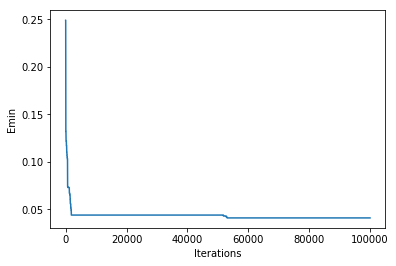

In [348]:
import matplotlib.pyplot as plt
plt.plot(pocket.Iterations,pocket.EminArr, label='g(x)')
plt.xlabel("Iterations");
plt.ylabel("Emin");
plt.show()

# Linear Regression Contour Plot

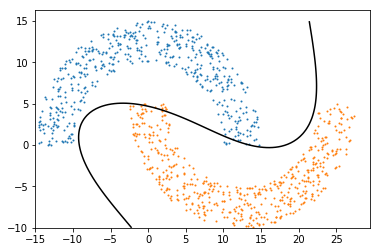

In [339]:
#w3_linear=linear_regression(data,order=3) w3_linear = [val for sublist in w3_linear for val in sublist] 
#print(w3_linear); print('3rd Order Linear Regression Ein : ',error(w3_linear,3)) 
w=Wmin
xlist = np.linspace(-15.0, 25.0,100) 
ylist = np.linspace(-10.0, 15.0,100)  
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*3 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid') 
plt.scatter(X1,Y1,s = 1) 
plt.scatter(X2,Y2,s=1)
plt.show()


#  Pocket Algorithm Contour Plot

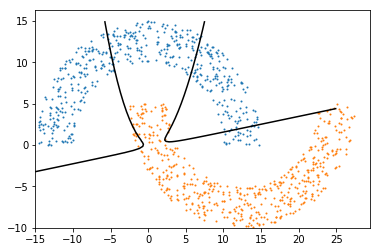

In [340]:
w = pocket.W
xlist = np.linspace(-15.0, 25.0,100) 
ylist = np.linspace(-10.0, 15.0,100)  
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*3 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid') 
plt.scatter(X1,Y1,s = 1) 
plt.scatter(X2,Y2,s=1)
plt.show()

# Linear algorithm performs faster than pocket algorithm

# Performance of linear algorithm is better than pocket in Z dimensional space